**Уровень 1:**  
Дан объект в 2d пространстве:
```python
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```

При помощи матричных операций выполните:  
Уменьшить объект в два раза.  
Повернуть на 130 градусов.  
Отразить объект относительно прямой y=x  
Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

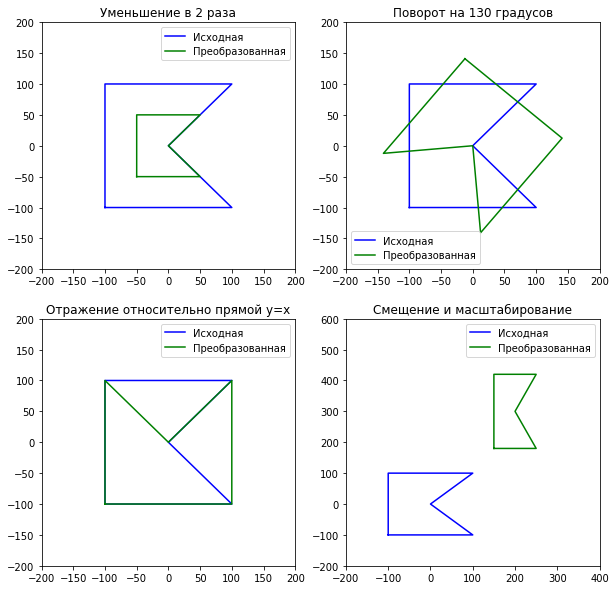

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_figure(plt, fig, color):
    x = fig[:,0]
    y = fig[:,1]
    plt.plot(x, y, color=color)

def plot_scheme(plt, src, dst, text, xlim=(-200, 200), ylim=(-200, 200)):
    plot_figure(plt, src, 'b')
    plot_figure(plt, dst, 'g')
    plt.set_title(text)
    plt.set_xlim(xlim[0], xlim[1])
    plt.set_ylim(ylim[0], ylim[1])
    plt.legend(["Исходная", "Преобразованная"]);

def mul(mtx, s1, s2):
    m_mtx = np.array([
        [s1, 0,  0],
        [0,  s2, 0],
        [0,  0,  1]
    ])
    
    res = []
    for vec in mtx:
        res.append(np.dot(m_mtx, vec))
    return np.array(res)

def rot(mtx, angle):
    a = angle * np.pi / 180;
    r_mtx = np.array([
        [np.cos(a),  np.sin(a), 0],
        [-np.sin(a), np.cos(a), 0],
        [0,          0,         1]
    ])
    
    res = []
    for vec in mtx:
        res.append(np.dot(r_mtx, vec))
    return np.array(res)

def mir(mtx):
    m_mtx = np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])   
    
    res = []
    for vec in mtx:
        res.append(np.dot(vec, m_mtx))
    return np.array(res)

def com(mtx, m1, m2, s1, s2):
    t_mtx = np.array([
        [s1,  0,   m1],
        [0,   s2,  m2],
        [0,   0,   1]
    ]) 
    
    res = []
    for vec in mtx:
        res.append(np.dot(t_mtx, vec))
    return np.array(res)


A = np.array([
    [-100, -100, 1],
    [-100, 100,  1],
    [100,  100,  1],
    [0,    0,    1],
    [100,  -100, 1],
    [-100, -100, 1]
])

mu = mul(A, 0.5, 0.5)
ro = rot(A, 130)
mi = mir(A)
co = com(A, 200, 300, 0.5, 1.2)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plot_scheme(axs[0, 0], A, mu, "Уменьшение в 2 раза")
plot_scheme(axs[0, 1], A, ro, "Поворот на 130 градусов")
plot_scheme(axs[1, 0], A, mi, "Отражение относительно прямой y=x")
plot_scheme(axs[1, 1], A, co, "Смещение и масштабирование", (-200, 400), (-200, 600))

**Уровень 0:**  
Создайте матрицу 3 на 3, заполненную числами от 1 до 9  
Прибавьте к ней матрицу с единицами на диагонале  
Умножьте полученную матрицу на вектор (1, 2, 3)  
Посчитайте обратную матрицу к полученной матрице

In [45]:
import numpy as np

m = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

s = m + np.eye(3)
print("Сумма матриц:\n", s)
v = np.array([1, 2, 3])
r = np.dot(s, v)
print("\nУмножение матрицы на вектор:\n", r)
d = np.linalg.det(s)
if round(d, 6) == 0:
    print("\nНевозможно посчитать обратную матрицу, определитель матрицы равен нулю.")
else:
    inv = np.linalg.inv(s)
    res = []
    for row in inv:
        res.append([round(p, 6) for p in row])
    print("\nОбратная матрица к сумме матриц:\n", np.array(res))

Сумма матриц:
 [[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]

Умножение матрицы на вектор:
 [15. 34. 53.]

Обратная матрица к сумме матриц:
 [[-6.  -2.   3. ]
 [-1.   0.5  0. ]
 [ 5.   1.  -2. ]]
